# Dependencies - Data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
import random

In [7]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implementation of ThomsonSampling Algorithm

In [9]:
# Number of rounds (experiments)
N = 10000  

# Number of ads (or choices)
d = 10  

# List to store the indices of selected ads
ads_selected = []  

# Lists to count the number of times each ad got rewards 1 and 0
numbers_of_rewards_1 = [0] * d  # Successes (reward = 1)
numbers_of_rewards_0 = [0] * d  # Failures (reward = 0)

# Variable to store the total reward accumulated
total_reward = 0  

# Loop through each round of the experiment
for n in range(0, N):  
    ad = 0  # Variable to store the index of the selected ad
    max_random = 0  # Keeps track of the highest random draw

    # Loop through each ad to calculate its beta distribution sample
    for i in range(0, d):  
        # Draw a random sample from the Beta distribution for ad `i`
        # Beta parameters: (successes + 1, failures + 1)
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)  
        
        # Update the selected ad if this random draw is the largest so far
        if random_beta > max_random:  
            max_random = random_beta  
            ad = i  # Store the index of the ad with the highest random beta value

    # Add the selected ad to the list of selected ads
    ads_selected.append(ad)  
    
    # Fetch the reward of the selected ad for the current round
    reward = df.values[n, ad]  
    
    # Update the reward counts for the selected ad
    if reward == 1:  
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1  # Increment successes
    else:  
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1  # Increment failures
    
    # Update the total reward accumulated
    total_reward = total_reward + reward  


# Visualization

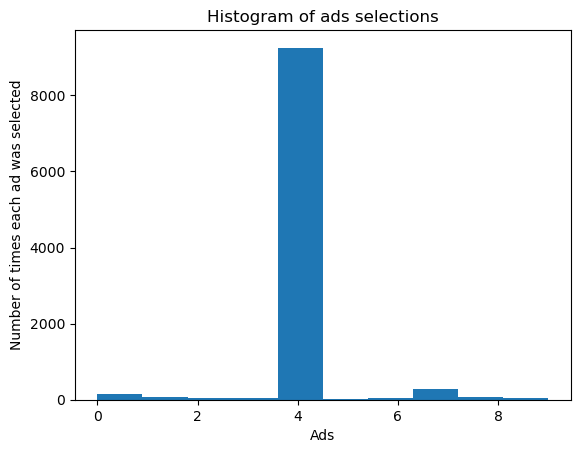

In [10]:
# Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()